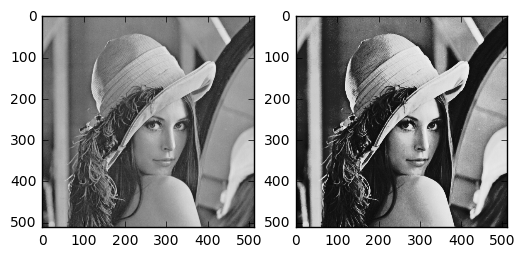

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

####################################################### QUESTION 1#############################################################
def TransformationMatrix(input_r):
    x = input_r
    x = np.piecewise(x, [x <= 100, x > 100, x >= 165], [lambda x: (2/5)*x, lambda x: (32/13)*x - 206, lambda x: (11/18)*x + 99]) 
    return x

image = cv2.imread("lena.jpg")
image_convert = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
output_mat = TransformationMatrix(image_convert)

plt.figure
plt.subplot(121), plt.imshow(image_convert)
plt.subplot(122), plt.imshow(output_mat)
plt.show()



###############################################################################################################################

[ 2  8 10 11 13 16 22 25]


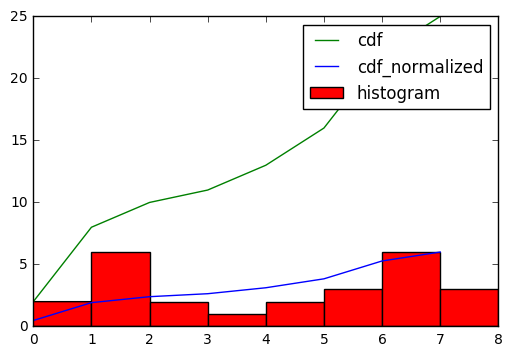

[[0 3 2 6 1]
 [6 4 7 6 1]
 [5 6 1 7 5]
 [1 4 0 7 6]
 [1 6 2 1 5]]
[ 2  2 10 13 16 16 22 25]


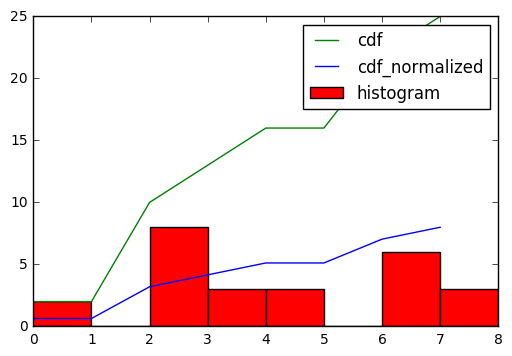

[[0 3 2 6 2]
 [6 3 7 6 2]
 [4 6 2 7 4]
 [2 3 0 7 6]
 [2 6 2 2 4]]
[ 2  2 10 13 16 16 22 25]


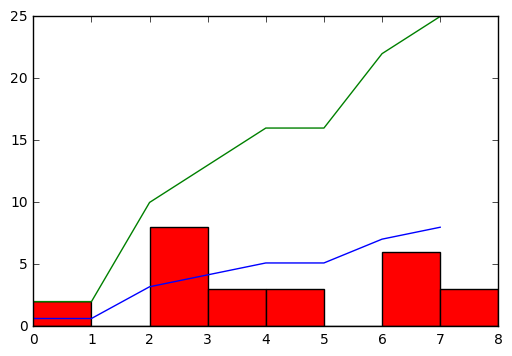

[[0 3 2 6 2]
 [6 3 7 6 2]
 [4 6 2 7 4]
 [2 3 0 7 6]
 [2 6 2 2 4]]
[ 2  2 10 13 16 16 22 25]


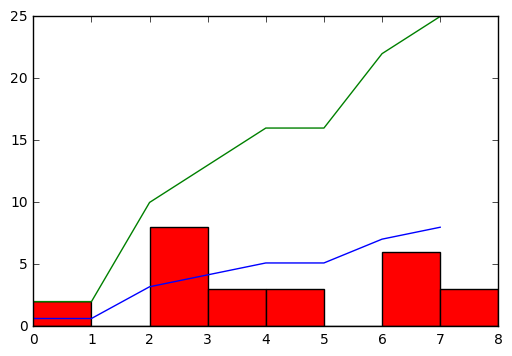

[[0 3 2 6 2]
 [6 3 7 6 2]
 [4 6 2 7 4]
 [2 3 0 7 6]
 [2 6 2 2 4]]
[ 2  2 10 13 16 16 22 25]


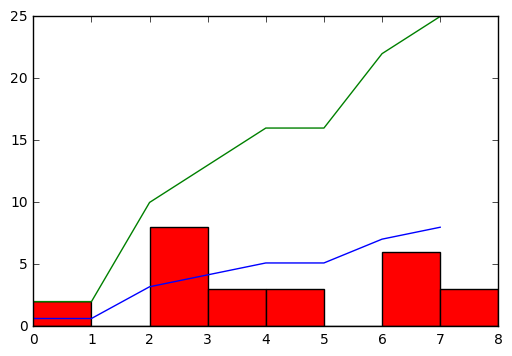

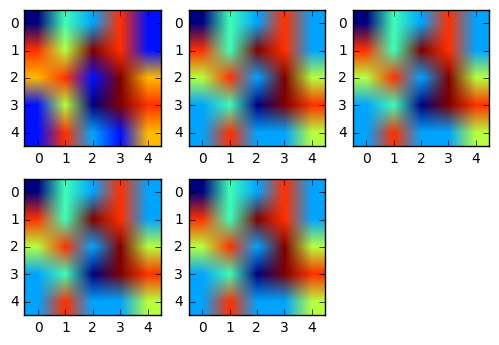

In [24]:
###############################################QUESTION 2############################################################
imageArray = np.array([[0,3,2,6,1], [6,4,7,6,1], [5,6,1,7,5], [1,4,0,7,6], [1,6,2,1,5]])

cdf, cdf_normalized = histogramAnalysis(imageArray)
print(cdf)
plt.figure
plt.plot(cdf, color = 'g')
plt.plot(cdf_normalized, color = 'b')
plt.hist(imageArray.flatten(), 8, [0, 8], color = 'r')
plt.xlim([0, 8])
plt.legend(('cdf', 'cdf_normalized', 'histogram'))
plt.savefig("original")
plt.show()



imageArray2 = histogramEqualize(imageArray, cdf)

cdf2, cdf_normalized2 = histogramAnalysis(imageArray2)
print(cdf2)
plt.figure
plt.plot(cdf2, color = 'g')
plt.plot(cdf_normalized2, color = 'b')
plt.hist(imageArray2.flatten(), 8, [0, 8], color = 'r')
plt.xlim([0, 8])
plt.legend(('cdf', 'cdf_normalized', 'histogram'))
plt.savefig("1st")
plt.show()

imageArray3 = histogramEqualize(imageArray2, cdf2)

cdf3, cdf_normalized3 = histogramAnalysis(imageArray3)
print(cdf3)
plt.figure
plt.plot(cdf3, color = 'g')
plt.plot(cdf_normalized3, color = 'b')
plt.hist(imageArray3.flatten(), 8, [0, 8], color = 'r')
plt.xlim([0, 8])
plt.savefig("2nd")
plt.show()

imageArray4 = histogramEqualize(imageArray3, cdf3)

cdf, cdf_normalized = histogramAnalysis(imageArray4)
print(cdf)
plt.figure
plt.plot(cdf, color = 'g')
plt.plot(cdf_normalized, color = 'b')
plt.hist(imageArray4.flatten(), 8, [0, 8], color = 'r')
plt.xlim([0, 8])
plt.savefig("3rd")
plt.show()

imageArray5 = histogramEqualize(imageArray4, cdf)

cdf, cdf_normalized = histogramAnalysis(imageArray5)
print(cdf)
plt.figure
plt.plot(cdf, color = 'g')
plt.plot(cdf_normalized, color = 'b')
plt.hist(imageArray5.flatten(), 8, [0, 8], color = 'r')
plt.xlim([0, 8])
plt.savefig("4th")
plt.show()

plt.figure
plt.subplot(231), plt.imshow(imageArray)
plt.subplot(232), plt.imshow(imageArray2)
plt.subplot(233), plt.imshow(imageArray3)
plt.subplot(234), plt.imshow(imageArray4)
plt.subplot(235), plt.imshow(imageArray5)
plt.savefig("All")
plt.show()
#####################################################################################################################

In [23]:
def histogramAnalysis(arrayInput):
    hist, bins = np.histogram(arrayInput.flatten(), 8, [0, 8])
    cdf = hist.cumsum()
    cdf_normalized = cdf * ( hist.max() / cdf.max() )
    return cdf, cdf_normalized

def histogramEqualize(arrayInput, cdf):
    
    cdf_mask = np.ma.masked_equal(cdf, 0)
    cdf_mask = np.round( ( cdf_mask - cdf_mask.min() ) /  (cdf_mask.max() - cdf_mask.min()) * 7  )
    new_cdf = np.ma.filled(cdf_mask, 0).astype('uint8')
    new_output_array = new_cdf[arrayInput]
    return new_output_array

[[0 3 2 6 1]
 [6 4 7 6 1]
 [5 6 1 7 5]
 [1 4 0 7 6]
 [1 6 2 1 5]]


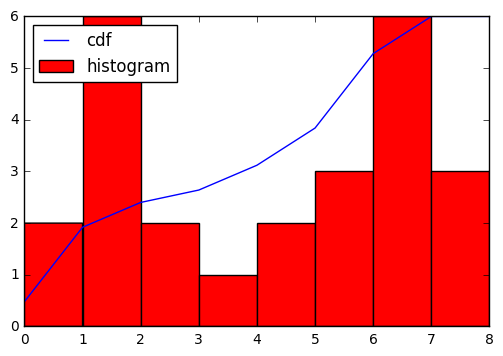

In [20]:

imageArray = np.array([[0,3,2,6,1], [6,4,7,6,1], [5,6,1,7,5], [1,4,0,7,6], [1,6,2,1,5]])
hist,bins = np.histogram(imageArray.flatten(),256,[0,256])
print(imageArray)
# this finds the cdf of the histogram 
cdf = hist.cumsum()      

cdf_normalized = cdf * hist.max()/ cdf.max()     # normalize just to scale values down to show it clearly within histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(imageArray.flatten(),8,[0,8], color = 'r')
plt.xlim([0,8])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


In [21]:
cdf_m = np.ma.masked_equal(cdf,0)
# print(cdf_m)
cdf_m = np.round((cdf_m - cdf_m.min())/(cdf_m.max()-cdf_m.min())*7)     # discretize back the CDF values to [0, 255]
# print(cdf_m)


new_cdf = np.ma.filled(cdf_m,0).astype('uint8')
# print(new_cdf)

# this does the mapping -- using the scaled cdf to look for the new intensity values
pout2 = new_cdf[imageArray]

[[0 3 2 6 2]
 [6 3 7 6 2]
 [4 6 2 7 4]
 [2 3 0 7 6]
 [2 6 2 2 4]]


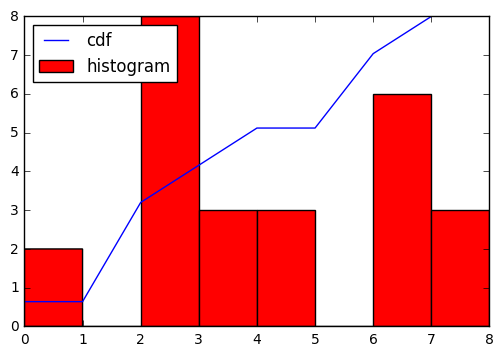

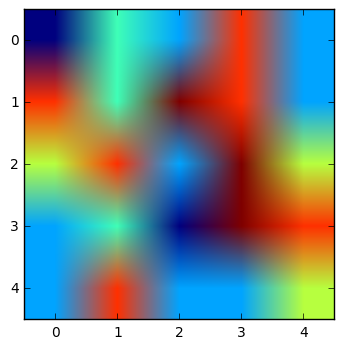

In [22]:
hist2,bins = np.histogram(pout2.flatten(),8,[0,8])
print(pout2)
cdf2 = hist2.cumsum()
cdf_normalized = cdf2 * hist2.max()/ cdf2.max()     # normalize just to scale values down to show it clearly within histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(pout2.flatten(),8,[0,8], color = 'r')
plt.xlim([0,8])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
plt.imshow(pout2); plt.show()

In [23]:
cdf_m = np.ma.masked_equal(cdf2,0)
# print(cdf_m)
cdf_m = np.round((cdf_m - cdf_m.min())/(cdf_m.max()-cdf_m.min())*7)     # discretize back the CDF values to [0, 255]
# print(cdf_m)


new_cdf = np.ma.filled(cdf_m,0).astype('uint8')
# print(new_cdf)

# this does the mapping -- using the scaled cdf to look for the new intensity values
pout2 = new_cdf[imageArray]

[[0 3 2 6 0]
 [6 4 7 6 0]
 [4 6 0 7 4]
 [0 4 0 7 6]
 [0 6 2 0 4]]


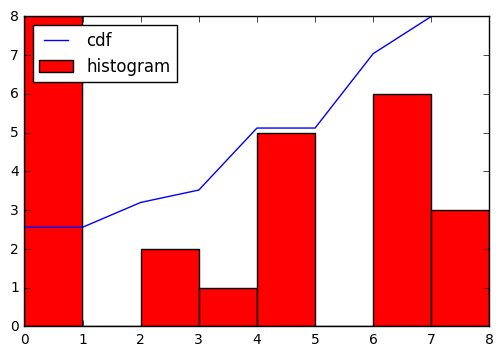

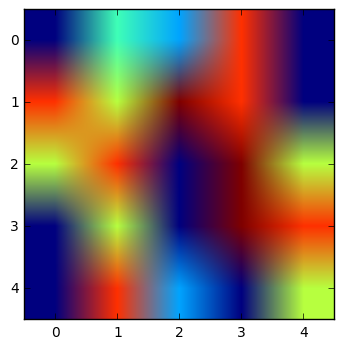

In [24]:
hist2,bins = np.histogram(pout2.flatten(),8,[0,8])
print(pout2)
cdf2 = hist2.cumsum()

cdf_normalized = cdf2 * hist2.max()/ cdf2.max()     # normalize just to scale values down to show it clearly within histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(pout2.flatten(),8,[0,8], color = 'r')
plt.xlim([0,8])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
plt.imshow(pout2); plt.show()

In [25]:
cdf_m = np.ma.masked_equal(cdf2,0)
# print(cdf_m)
cdf_m = np.round((cdf_m - cdf_m.min())/(cdf_m.max()-cdf_m.min())*7)     # discretize back the CDF values to [0, 255]
# print(cdf_m)


new_cdf = np.ma.filled(cdf_m,0).astype('uint8')
# print(new_cdf)

# this does the mapping -- using the scaled cdf to look for the new intensity values
pout2 = new_cdf[pout2]

[[0 1 1 6 0]
 [6 3 7 6 0]
 [3 6 0 7 3]
 [0 3 0 7 6]
 [0 6 1 0 3]]


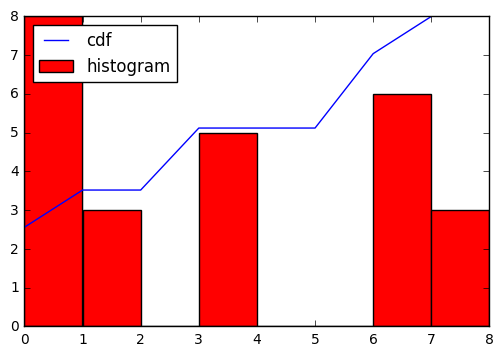

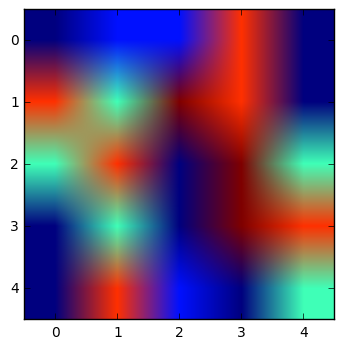

In [26]:
hist2,bins = np.histogram(pout2.flatten(),8,[0,8])
print(pout2)
cdf2 = hist2.cumsum()

cdf_normalized = cdf2 * hist2.max()/ cdf2.max()     # normalize just to scale values down to show it clearly within histogram
plt.plot(cdf_normalized, color = 'b')
plt.hist(pout2.flatten(),8,[0,8], color = 'r')
plt.xlim([0,8])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()
plt.imshow(pout2); plt.show()